La clase de hoy nos permitirá crear un filtro (algo rudimentario) de imágenes en función de agrupamiento de colores

In [281]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

Comenzamos cargando una imagen.

In [397]:
# Cargamos nuestra imagen
img = cv2.imread('selfie.jpg')
# Fijamos los colores RGB originales
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

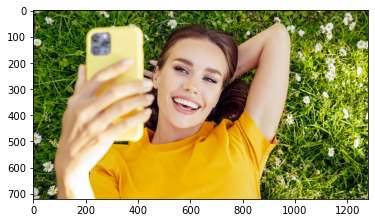

In [398]:
plt.imshow(img)
plt.show()

In [399]:
# Dado que tenemos una matriz RGB (red, green, blue) vamos a ajustar
# la variable de entrada para ser utilizada en K-means
pixel_vals = img.reshape((-1,3))
print(pixel_vals)
print('Cantidad de pixeles: ', len(pixel_vals))

[[ 37  55   3]
 [115 133  85]
 [ 84 102  62]
 ...
 [230 233 186]
 [222 225 178]
 [171 177 129]]
Cantidad de pixeles:  921600


In [285]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(pixel_vals)

Una vez que hemos creado la instancia de nuestro modelo, podemos obtener los valores de interés, como nuestros centroides (*cluster_center_*) y las etiquetas creadas (*labels_*).

In [286]:
centers = np.uint8(kmeans.cluster_centers_)
print(centers)

[[ 67  89  17]
 [220 193 155]
 [229 170   5]
 [ 23  36   8]
 [122 138  32]
 [222 206  71]
 [237 226 201]
 [183 146 108]]


In [287]:
print(kmeans.labels_[:20])

[3 4 0 3 3 0 7 1 6 6 1 7 7 5 2 2 2 2 2 4]


In [288]:
print(centers[kmeans.labels_])

[[ 23  36   8]
 [122 138  32]
 [ 67  89  17]
 ...
 [237 226 201]
 [237 226 201]
 [183 146 108]]


Ahora podemos ordenar nuestro vector por fila para obtener la matriz que representa a la imagen completa.

In [289]:
segmented_data = centers[kmeans.labels_]
# Reajustamos nuestro vector a la dimensión original
segmented_image = segmented_data.reshape((img.shape))

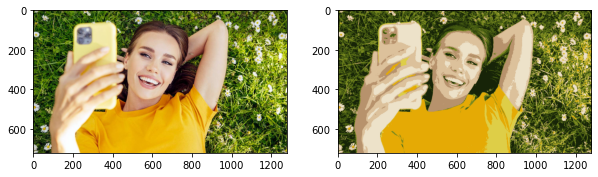

In [290]:
h, w = 1, 2
fig = plt.figure(figsize=(w, h))
plt.subplots_adjust(bottom=4, right=4, top=6)
# Graficamos la imágen original
fig.add_subplot(h, w, 1)
ax = plt.imshow(img)    
# Graficamos la imágen segmentada
fig.add_subplot(h, w, 2)
ax = plt.imshow(segmented_image)    
plt.show()

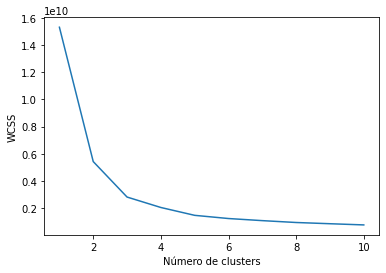

In [371]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pixel_vals) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') 
plt.show()

In [375]:
M = [img]
clusters = ['Original', 2, 3, 5, 12, 20]

In [390]:
center_k_5 = []
for n_c in clusters[1:]:
    kmeans = KMeans(n_clusters=n_c, random_state=0).fit(pixel_vals)
    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_]
    segmented_image = segmented_data.reshape((img.shape))
    M.append(segmented_image)
    if n_c == 5:
        center_k_5.append(kmeans.cluster_centers_)

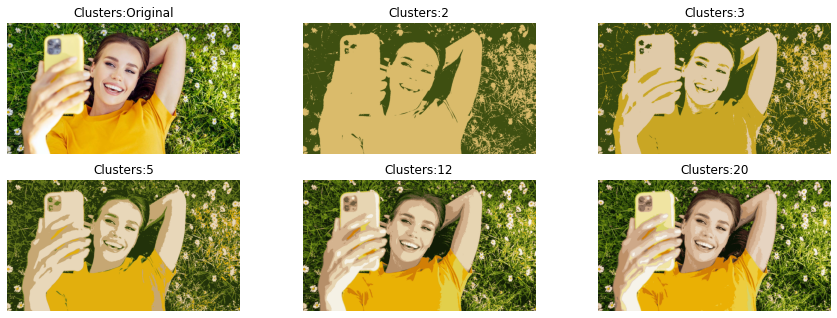

In [391]:
h, w = 2, 3
fig = plt.figure(figsize=(w, h))
plt.subplots_adjust(bottom=4, right=4, top=6)
for i in range(w*h):
    fig.add_subplot(h, w, i + 1).set_title(f'Clusters:{clusters[i]}')
    ax = plt.imshow(M[i])    
    plt.axis('off')
plt.show()

In [392]:
print(center_k_5)
colors = np.array(center_k_5)/255.0
print(colors)

[array([[232.76141766, 215.93901387, 185.45833567],
       [101.35979273, 119.10236099,  28.25224437],
       [ 34.00512305,  50.15926827,  10.15258726],
       [226.45935124, 175.84575958,  13.7831616 ],
       [198.39968237, 167.48601281, 115.54855814]])]
[[[0.91278987 0.84681966 0.72728759]
  [0.39748938 0.46706808 0.11079312]
  [0.13335342 0.19670301 0.03981407]
  [0.88807589 0.68959121 0.05405161]
  [0.77803797 0.65680789 0.4531316 ]]]


Ahora, podemos extraer la paleta de colores que utiliza nuestra imagen considerando 5 clusters.

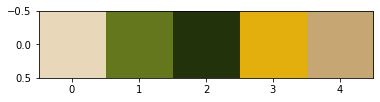

In [394]:
fig, ax = plt.subplots()
ax.imshow(colors)
ax.set_aspect("equal")
plt.show()

In [ ]:
precio + 3*gastos + ganancia² = GH